    Distance between two authors, how ? 
    - Directed link between two authors if one has quoted another in order to show how many source have already quoted targets
    - Non directed link between two authors if they have already colaborated together in order to know if one of the target authors has colaborated with one of the source authors
    - Distance in a directed graph
    - Distance in a non directed graph 
    
    - Target article popularity
    - How many times source authors has quoted target authors in other articles

Is in giant component

Number of already quoted articles

Should we take weight in consideration ?

Authors graph:
    - Colaboration every node are connected to whom they worked with
        - Are they connected ? 
        - What is their distance ? 
    - Quotation graph u and v has quoted v 
        - Are they connected ? 
        - What is their distance ? 
    - Undirected quotation graph

In [4]:
import sys
sys.path.append('/Users/mnannan/dev/supelec/ngsa/assignments/Assignement 2 ')

In [8]:
from core.io.loader import *

In [443]:
import igraph

In [1]:
train = get_data_with_node_information('train', data_dir='../data')

NameError: name 'get_data_with_node_information' is not defined

In [19]:
for authors in train.source_authors.drop_duplicates().values[:100]:
    print(authors)
    print(extract_authors(authors))
    print('======================')

nan
None
J.-G. Zhou, Y.-G. Miao, J.-Q.Liang, H.J.W.Mueller-Kirsten, Zhenjiu Zhang
['jgzhou', 'ygmiao', 'jqliang', 'hjwmuellerkirsten', 'zhenjiuzhang']
E. Bergshoeff, M. de Roo, M.B. Green, G. Papadopoulos, P.K.
['ebergshoeff', 'mderoo', 'mbgreen', 'gpapadopoulos', 'pk']
Bruno G. Carneiro da Cunha, P. Teotonio-Sobrinho
['brunogcarneirodacunha', 'pteotoniosobrinho']
Jian-Ge Zhou, F. Zimmerschied, J.--Q. Liang, H.J.W. Mueller--Kirsten
['jiangezhou', 'fzimmerschied', 'jqliang', 'hjwmuellerkirsten']
H.J.W.Muller-Kirsten, Jian-Ge Zhou, Yan-Gang Miao, J.-Q.Liang
['hjwmullerkirsten', 'jiangezhou', 'yangangmiao', 'jqliang']
Amir Masoud Ghezelbash
['amirmasoudghezelbash']
S. Odintsov, R. Percacci
['sodintsov', 'rpercacci']
Eric D'Hoker, I. M. Krichever, D. H. Phong
['ericdhoker', 'imkrichever', 'dhphong']
Rafael Hern, ez
['rafaelhern', 'ez']
Mikhail S. Plyushchay
['mikhailsplyushchay']
Carl M. Bender, Dorje C. Brody, Hugh F. Jones
['carlmbender', 'dorjecbrody', 'hughfjones']
Sung-Won Kim, Won T.

In [163]:
import re 
def extract_authors_list(authors):
    stopwords = ['alex', 't', 'latex', 'pages', 'jr', 's']
    if isinstance(authors, str):
        
        # Remove string between parenthesis
        string = re.sub(r'\([^\)]+[\)$]','',authors)
        # Remove bad parenthesis
        string = re.sub(r'\([^\)]*$','', string)
        # Remove multiple spaces
        string = re.sub(r'\s', '', string)
        # Extract authors and sanityze strings
        
        authors = []
        for author in string.split(','):
            author = author.lower()
            author = re.sub(r'[\W\d]','', author).lower()
            if len(author) > 2 and not author in stopwords:
                authors.append(author)
        return authors

def common_authors(authors1, authors2):
    if authors1 and authors2:
        return len(set(authors1).intersection(set(authors2)))
    else: 
        return 0
    

In [164]:
train['source_authors_list'] = train.source_authors.apply(lambda x: extract_authors_list(x))

In [165]:
train['target_authors_list'] = train.target_authors.apply(lambda x: extract_authors_list(x))

In [166]:
train['common_authors'] = train.apply(lambda x: common_authors(x.target_authors_list, x.source_authors_list), axis= 'columns')

###### Common authors per couple target_id, source_id

In [167]:
(train.common_authors > 0).value_counts()

False    579766
True      35746
Name: common_authors, dtype: int64

###### Dataset size

In [252]:
train[['source_id', 'source_authors_list']].shape

(615512, 2)

###### Number of distinct articles

In [254]:
train[['source_id', 'source_authors_list']].drop_duplicates('source_id').shape

(27770, 2)

In [256]:
source_authors_list = []
target_authors_list = []
df = train[['source_id', 'source_authors_list']].drop_duplicates('source_id')
for source_id, authors in zip(df.source_id.values, df.source_authors_list.values):
    if authors:
        for author in authors:
            source_authors_list.append((source_id, author))
df = train[['target_id', 'target_authors_list']].drop_duplicates('target_id')
for target_id, authors in zip(df.target_id.values, df.target_authors_list.values):
    if authors:
        for author in authors:
            target_authors_list.append((target_id, author))

In [257]:
source_authors = pd.DataFrame(source_authors_list)

source_authors = source_authors.rename({0:'paper_id', 1:'author'}, axis='columns')

In [499]:
target_authors = pd.DataFrame(target_authors_list)

target_authors = target_authors.rename({0:'paper_id', 1:'author'}, axis='columns')

In [259]:
source_authors.nunique()

author    11386
dtype: int64

In [260]:
target_authors.nunique()

author    11386
dtype: int64

In [261]:
source_authors.append(target_authors).nunique()

author    11386
dtype: int64

In [262]:
source_authors.author.value_counts()

cnpope                126
hlu                   124
aatseytlin             93
sdodintsov             84
shinichinojiri         81
eelizalde              77
sergeidodintsov        75
cumrunvafa             74
edwardwitten           72
sferrara               72
renatakallosh          68
gwgibbons              65
ashokdas               64
ianikogan              61
burtaovrut             57
mirjamcvetic           56
mcvetic                56
esezgin                54
pktownsend             54
iantoniadis            54
mjduff                 53
ilbuchbinder           53
pshowe                 50
bartonzwiebach         50
cmhull                 50
gregorymoore           50
michaelrdouglas        49
sergeivketov           49
dieterlust             49
yaronoz                48
                     ... 
nobuyukisakai           1
hrsepangi               1
eckhardmeinrenken       1
mdelatorremayado        1
vimankogmarmo           1
lbelardinelli           1
anthonyjbracken         1
sazzadnasir 

In [263]:
target_authors.author.value_counts()

cnpope               126
hlu                  124
aatseytlin            93
sdodintsov            84
shinichinojiri        81
eelizalde             77
sergeidodintsov       75
cumrunvafa            74
sferrara              72
edwardwitten          72
renatakallosh         68
gwgibbons             65
ashokdas              64
ianikogan             61
burtaovrut            57
mcvetic               56
mirjamcvetic          56
pktownsend            54
iantoniadis           54
esezgin               54
ilbuchbinder          53
mjduff                53
cmhull                50
pshowe                50
gregorymoore          50
bartonzwiebach        50
sergeivketov          49
dieterlust            49
michaelrdouglas       49
yaronoz               48
                    ... 
cecilemartin           1
rvunge                 1
philipperoche          1
rsturani               1
jessieshelton          1
shwang                 1
amiemiec               1
valerypkarassiov       1
nobuyukisakai          1


In [143]:
target_authors[target_authors.author == 'jmartin']

,author
0,
109207,jmartin
109207,jmartin
109207,jmartin
109207,jmartin


In [146]:
train.merge(target_authors[target_authors.author == 'jmartin'].drop_duplicates(), how='inner', right_index=True, left_on='target_id')

,source_id,target_id,category,source_publication_date,target_publication_date,source_title,target_title,source_authors,target_authors,source_journal,target_journal,source_abstract,target_abstract,source_authors_list,target_authors_list,common_authors,author
256180,9405016,109207,0,1994,2001,perturbed gauged wznw models,quintessence model building,O. A. Soloviev,"Ph. Brax, J. Martin, A. Riazuelo",Nucl.Phys.,NaN,in nucl phys b we discuss a new type of unitar...,american university of paris a short review of...,[oasoloviev],"[phbrax, jmartin, ariazuelo]",0,jmartin
467251,112207,109207,0,2001,2001,supergravity interacting with bosonic p-branes...,quintessence model building,"Igor A. B, os, Jose A. de Azcarraga, Jose M. I...","Ph. Brax, J. Martin, A. Riazuelo",Phys.Rev.,NaN,we study the coupling of supergravity with a p...,american university of paris a short review of...,"[igorab, os, joseadeazcarraga, josemizquierdo]","[phbrax, jmartin, ariazuelo]",0,jmartin
346696,9510069,109207,0,1995,2001,su 3 einstein-yang-mills-dilaton sphalerons an...,quintessence model building,"Burkhard Kleihaus, Jutta Kunz, Abha Sood","Ph. Brax, J. Martin, A. Riazuelo",Phys.Lett.,NaN,su 3 einstein-yang-mills-dilaton theory posses...,american university of paris a short review of...,"[burkhardkleihaus, juttakunz, abhasood]","[phbrax, jmartin, ariazuelo]",0,jmartin
245910,9905197,109207,0,1999,2001,bosonization of quantum sine-gordon field with...,quintessence model building,"Bo-yu Hou, Kang-jie Shi, Yan-shen Wang, Wen-li...","Ph. Brax, J. Martin, A. Riazuelo",Int.J.Mod.Phys.,NaN,boundary operators and boundary ground states ...,american university of paris a short review of...,"[boyuhou, kangjieshi, yanshenwang, wenliyang]","[phbrax, jmartin, ariazuelo]",0,jmartin


In [147]:
train.merge(source_authors[ source_authors.author == 'fdebiasio'].drop_duplicates(), how='inner', right_index=True, left_on='source_id')

,source_id,target_id,category,source_publication_date,target_publication_date,source_title,target_title,source_authors,target_authors,source_journal,target_journal,source_abstract,target_abstract,source_authors_list,target_authors_list,common_authors,author
270380,9402029,9604113,0,1994,1996,light like wilson loops and gauge invariance o...,physical unitarity in the lagrangian sp 2 symm...,"A. Bassetto, F. De Biasio, L. Griguolo","P.M. Lavrov, P.Yu. Moshin",Phys.Rev.Lett.,Nucl.Phys.,1 1 dimensions a light-like wilson loop is com...,the structure of state vector space for a gene...,"[abassetto, fdebiasio, lgriguolo]","[pmlavrov, pyumoshin]",0,fdebiasio
60048,9402029,9612169,0,1994,1996,light like wilson loops and gauge invariance o...,schwinger dyson equations and dynamical symmet...,"A. Bassetto, F. De Biasio, L. Griguolo","Y. I. Shil'nov, V. V. Chitov, A.T. Kotwicki",Phys.Rev.Lett.,Russ.Phys.J.,1 1 dimensions a light-like wilson loop is com...,r 2 gravity the dymamical chiral symmetry brea...,"[abassetto, fdebiasio, lgriguolo]","[yishilnov, vvchitov, atkotwicki]",0,fdebiasio
475212,9402029,9306091,1,1994,1993,light like wilson loops and gauge invariance o...,the master field of qcd 2 and the t hooft equa...,"A. Bassetto, F. De Biasio, L. Griguolo","M. Cavicchi, P. Di Vecchia, I. Pes, o",Phys.Rev.Lett.,Mod.Phys.Lett.,1 1 dimensions a light-like wilson loop is com...,we rewrite the action for qcd 2 in the light c...,"[abassetto, fdebiasio, lgriguolo]","[mcavicchi, pdivecchia, ipes]",0,fdebiasio
535974,9402029,9705140,0,1994,1998,light like wilson loops and gauge invariance o...,violation of s-matrix factorization in massive...,"A. Bassetto, F. De Biasio, L. Griguolo","Takehisa Fujita, Makoto Hiramoto",Phys.Rev.Lett.,NaN,1 1 dimensions a light-like wilson loop is com...,we present a counter example which shows the v...,"[abassetto, fdebiasio, lgriguolo]","[takehisafujita, makotohiramoto]",0,fdebiasio


## Authors per paper analysis

In [282]:
source_authors = pd.DataFrame(source_authors_list)

source_authors = source_authors.rename({0:'paper_id', 1:'author'}, axis='columns').drop_duplicates()

###### Number of association paper / author

In [284]:
source_authors.shape

(50058, 2)

###### Number of paper with authors

In [286]:
source_authors.paper_id.nunique()

23736

###### Proportion of paper with authors

In [301]:
100 * source_authors.paper_id.nunique()/train.source_id.nunique()

85.47353258912496

In [306]:
source_authors.shape

(50058, 2)

In [308]:
authors_per_paper = source_authors.groupby('paper_id').count()

###### Average number of authors per paper

In [309]:
authors_per_paper.mean()

author    2.108948
dtype: float64

###### Authors per paper distribution

In [310]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Authors per paper repartition')

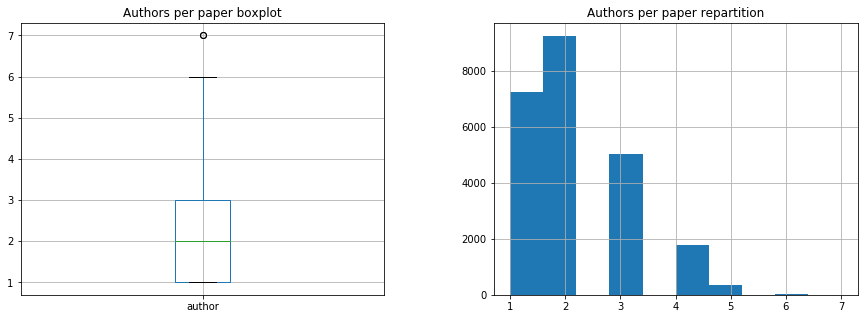

In [319]:
fig, axarr = plt.subplots(1,2, figsize=(15,5))
authors_per_paper.boxplot(ax=axarr[0])
axarr[0].set_title('Authors per paper boxplot')
authors_per_paper.hist(ax=axarr[1])
axarr[1].set_title('Authors per paper repartition')


In [321]:
paper_per_author = source_authors.groupby('author').count()

###### Average paper per author

In [323]:
paper_per_author.mean()

paper_id    4.396452
dtype: float64

###### Papers per author distribution

Text(0.5, 1.0, 'Papers per author repartition')

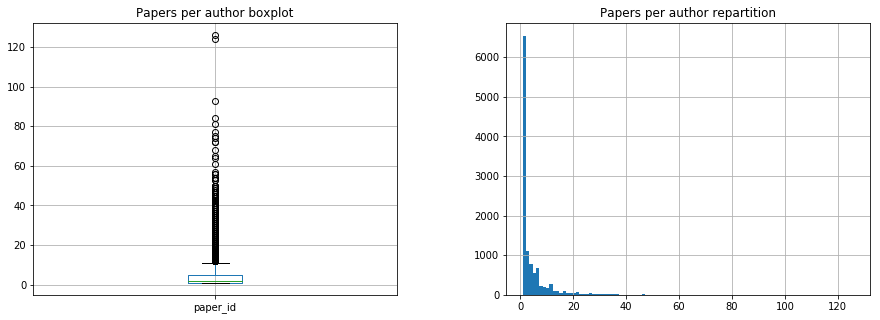

In [325]:
fig, axarr = plt.subplots(1,2, figsize=(15,5))
paper_per_author.boxplot(ax=axarr[0])
axarr[0].set_title('Papers per author boxplot')
paper_per_author.hist(ax=axarr[1], bins=100)
axarr[1].set_title('Papers per author repartition')


In [344]:
colaboration = source_authors.merge(source_authors, left_on='paper_id', right_on='paper_id', suffixes=('_1','_2'))

In [345]:
colaboration = colaboration[colaboration.author_1 != colaboration.author_2]

In [ ]:
colaboration['merge_authors'] = colaboration.apply(lambda x: ''.join(sorted([x.author_1, x.author_2])), axis='columns')

In [393]:
colaboration[['merge_authors', 'paper_id']].drop_duplicates()

,merge_authors,paper_id
1,jgzhouygmiao,9604093
2,jgzhoujqliang,9604093
3,hjwmuellerkirstenjgzhou,9604093
4,jgzhouzhenjiuzhang,9604093
7,jqliangygmiao,9604093
8,hjwmuellerkirstenygmiao,9604093
9,ygmiaozhenjiuzhang,9604093
13,hjwmuellerkirstenjqliang,9604093
14,jqliangzhenjiuzhang,9604093
19,hjwmuellerkirstenzhenjiuzhang,9604093


In [394]:
grouped_colaboration = \
colaboration[['merge_authors', 'paper_id']].drop_duplicates().groupby(['merge_authors']).count().rename({'paper_id':'number_of_paper'}, axis='columns')

###### Average number of co writen papers

In [399]:
grouped_colaboration.mean()

number_of_paper    1.84214
dtype: float64

###### Co writen papers distribution

Text(0.5, 1.0, 'Co writen papers per author pairs repartition')

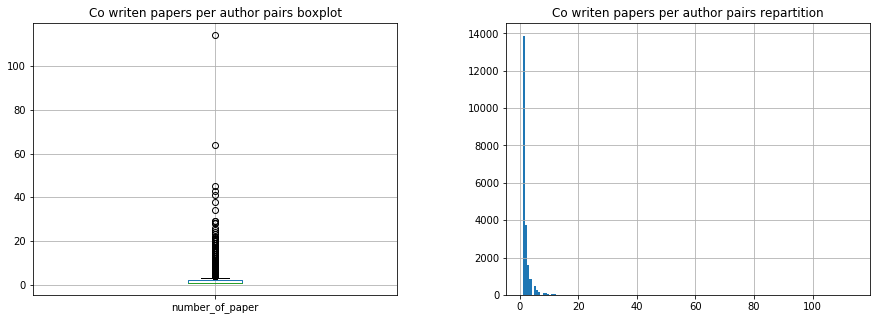

In [400]:
fig, axarr = plt.subplots(1,2, figsize=(15,5))
grouped_colaboration.boxplot(ax=axarr[0])
axarr[0].set_title('Co writen papers per author pairs boxplot')
grouped_colaboration.hist(ax=axarr[1], bins=150)
axarr[1].set_title('Co writen papers per author pairs repartition')


In [401]:
grouped_colaboration.sort_values('number_of_paper', ascending=False)

,number_of_paper
merge_authors,
cnpopehlu,114
sergeidodintsovshinichinojiri,64
eelizaldesdodintsov,45
hlumcvetic,43
cnpopemcvetic,41
rdauriasferrara,38
apbalachran,34
amironovamorozov,29
eivanovskrivonos,29


# Graphs

### Colaboration graph

As all the articles are in source and target we can just keep source authors to build colaboration graph

In [536]:
source_authors = pd.DataFrame(source_authors_list)
source_authors = source_authors.rename({0:'paper_id', 1:'author'}, axis='columns')

colaboration = source_authors.merge(source_authors, left_on='paper_id', right_on='paper_id', suffixes=('_1','_2'))
colaboration = colaboration[colaboration.author_1 != colaboration.author_2]
colaboration['merge_authors'] = colaboration.apply(lambda x: ''.join(sorted([x.author_1, x.author_2])), axis='columns')

authors_mapping = {value:key for key, value in source_authors.author.drop_duplicates().reset_index(drop=True).items()}

In [534]:
len(authors_mapping)

11386

In [486]:
colaboration_edges = colaboration.sort_values(['paper_id', 'author_1', 'author_2']).drop_duplicates(['paper_id', 'merge_authors'])

In [487]:
colaboration_edges_list = []
for author_1, author_2 in zip(colaboration_edges.author_1, colaboration_edges.author_2):
    colaboration_edges_list.append((authors_mapping[author_1], authors_mapping[author_2]))

In [488]:
s

In [489]:
graph_colaboration.vcount()

11386

In [490]:
graph_colaboration.ecount()

39291

###### Number of colaboration components

In [491]:
len(graph_colaboration.components())

1643

###### Giant component size

In [492]:
graph_colaboration.components().giant().vcount()

8237

###### Proportion of authors in the giant component

In [493]:
graph_colaboration.components().giant().vcount() / graph_colaboration.vcount()

0.7234322852626032

###### Colaboration components sizes

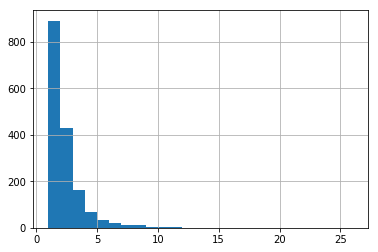

In [477]:
pd.Series(sorted(graph_colaboration.components().sizes())[:-1]).hist(bins=25)

## Extract number of connected authors

In [519]:
colaboration[['merge_authors']].drop_duplicates()[:5]

,merge_authors
1,jgzhouygmiao
2,jgzhoujqliang
3,hjwmuellerkirstenjgzhou
4,jgzhouzhenjiuzhang
7,jqliangygmiao


In [508]:
source_authors[:5]

,paper_id,author
0,9604093,jgzhou
1,9604093,ygmiao
2,9604093,jqliang
3,9604093,hjwmuellerkirsten
4,9604093,zhenjiuzhang


In [509]:
target_authors[:5]

,paper_id,author
0,9502114,wontkim
1,9502114,julianlee
2,9502114,youngjaipark
3,9408144,kazuoghoroku
4,9302075,skalyanarama


In [ ]:
train.merge()

In [595]:
authors_colaboration = train[['source_id', 'target_id']]\
.merge(source_authors, left_on='source_id',right_on='paper_id', how='outer')\
.merge(target_authors, left_on='target_id',right_on='paper_id', how='outer', suffixes=('_source', '_target'))\
.drop(['paper_id_source', 'paper_id_target'], axis='columns')

In [551]:
def merge_authors(x):
    if isinstance(x.author_target,str) and isinstance(x.author_source, str):
        return ''.join(sorted([x.author_source, x.author_target]))
    else:
        return np.na

In [598]:
authors_colaboration.shape

(2554464, 4)

In [602]:
authors_colaboration = authors_colaboration.dropna(subset=['author_source', 'author_target'])

In [655]:
authors_colaboration.shape

(2221986, 5)

In [604]:
authors_colaboration['merge_authors'] = authors_colaboration.apply(merge_authors , axis='columns')


/Users/mnannan/.virtualenvs/supelec/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [572]:
colaboration[:5][['merge_authors']]

,merge_authors
1,jgzhouygmiao
2,jgzhoujqliang
3,hjwmuellerkirstenjgzhou
4,jgzhouzhenjiuzhang
5,jgzhouygmiao


In [620]:
_authors_colaboration = authors_colaboration.drop(['author_source', 'author_target'], axis='columns')

In [622]:
_authors_colaboration = _authors_colaboration\
.merge(colaboration[['merge_authors', 'paper_id']].drop_duplicates('merge_authors'), on='merge_authors', how='left')


In [630]:
_authors_colaboration = _authors_colaboration.dropna(subset=['paper_id'])

In [633]:
_authors_colaboration.drop_duplicates(['source_id', 'target_id', 'merge_authors']).shape

(137415, 4)

In [643]:
c = authors_colaboration.groupby(['source_id', 'target_id', 'merge_authors']).count()

In [653]:
cond = (authors_colaboration.source_id == 9810122) & (authors_colaboration.target_id == 9804207)\
& (authors_colaboration.merge_authors == 'aleksarbelic')

In [654]:
authors_colaboration[cond]

,source_id,target_id,author_source,author_target,merge_authors
2020113,9810122,9804207,aleks,arbelic,aleksarbelic
2020117,9810122,9804207,arbelic,aleks,aleksarbelic
2020119,9810122,9804207,arbelic,aleks,aleksarbelic
2020123,9810122,9804207,aleks,arbelic,aleksarbelic


In [645]:
c.sort_values('author_source', ascending=False)

author_source  \
source_id target_id merge_authors                                     
9810122   9804207   aleksarbogojevic                              4   
                    aleksarbelic                                  4   
                    aleksantunbalaz                               4   
                    aleksaleks                                    4   
9905035   9510210   ivvolovichiyaarefeva                          2   
9702202   9405124   gwgibbonspktownsend                           2   
211118    207117    dlustgdallagata                               2   
9908126   9701137   matthiasrgaberdielorenbergman                 2   
9811248   9809209   cfordttok                                     2   
9801205   9709013   bartonzwiebachmatthiasrgaberdiel              2   
9811248   9809209   awipfttok                                     2   
                    awipfcford                                    2   
106213    103196    erdpopovolaflechtenfeld                       2   
9705064   9506109   mariotoninpaolopasti                          2   
9502024   9304081   ffalcetomasorey                               2   
11115     9910113   sergeidodintsovshinichinojiri                 2   
112104    9607037   iikoganrjszabo                                2   
9807051   9511203   cnpopeksstelle                                2   
9811248   9802191   cfordttok                                     2   
9807051   9511203   hluksstelle                                   2   
9603004   9408036   aceresolerdauria                              2   
                    aceresolesferrara                             2   
9811248   9802191   awipfttok                                     2   
9607114   9403196   sllyakhovichsmkuzenko                         2   
11116     5165      dkparkhjwmullerkirsten                        2   
9811248   9802191   awipfcford                                    2   
106213    12200     erdpopovolaflechtenfeld                       2   
9906039   9812093   cbachasiantoniadis                            2   
11115     9903033   sergeidodintsovshinichinojiri                 2   
9612105   9611014   landrianopolisferrara                         2   
...                                                             ...   
204226    110196    ampolyakovsfrolov                             1   
                    aatseytlinampolyakov                          1   
          107148    martinbuchersfrolov                           1   
                    aatseytlinmartinbucher                        1   
          8107      aatseytlinsfrolov                             1   
                    aatseytlinaatseytlin                          1   
          1204      nadavdrukkersfrolov                           1   
                    davidjgrosssfrolov                            1   
                    arkadytseytlinsfrolov                         1   
                    aatseytlinnadavdrukker                        1   
                    aatseytlindavidjgross                         1   
                    aatseytlinarkadytseytlin                      1   
204225    9904008   svenfkerstantombanks                          1   
                    lubosmotlsvenfkerstan                         1   
          9901003   skrivonossvenfkerstan                         1   
                    eivanovsvenfkerstan                           1   
          9811244   skrivonossvenfkerstan                         1   
                    sbelluccisvenfkerstan                         1   
                    eivanovsvenfkerstan                           1   
          9809121   sergeivketovsvenfkerstan                      1   
          9804051   pshowesvenfkerstan                            1   
                    oraetzelsvenfkerstan                          1   
                    esezginsvenfkerstan                           1   
          9802032   svenfkerstanwkummer                           1   
       

In [639]:
authors_colaboration.shape

(2221986, 5)

In [628]:
_authors_colaboration.dropna(subset=['paper_id'])\
.groupby(['source_id', 'target_id'])

,source_id,target_id,merge_authors,paper_id
90,9603043,9502114,sungwonkimwontkim,9603043.0
92,9603043,9502114,sungwonkimyoungjaipark,9603043.0
94,9603043,9502114,julianleewontkim,9502114.0
95,9603043,9502114,wontkimyoungjaipark,9603043.0
96,9603043,9502114,wontkimyoungjaipark,9603043.0
97,9603043,9502114,julianleeyoungjaipark,9502114.0
99,9603043,9502114,hyeonjoonshinwontkim,9603043.0
101,9603043,9502114,hyeonjoonshinyoungjaipark,9603043.0
112,9810055,9502114,julianleewontaekim,9811005.0
113,9810055,9502114,wontaekimyoungjaipark,103036.0
